# Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building


In [1]:
#import libraries
import pandas as pd
import numpy as np
df = pd.read_csv("../src/data/raw/creditcard.csv")

In [2]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df["Time"].nunique()

124592

In [4]:
df.shape

(284807, 31)

In [5]:
# duplicates in data
print(sum(df.duplicated()))

1081


0.379555277784605 is the percent of duplicate data

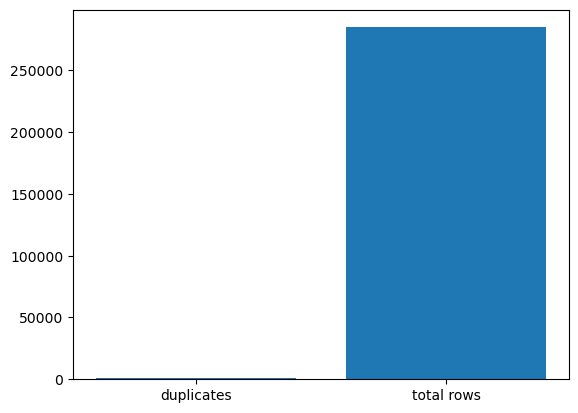

In [6]:
## check duplicated value 
from rich import print
vals = {"duplicates" : sum(df.duplicated()), "total rows" : 284807}
import matplotlib.pyplot as plt

plt.bar(vals.keys(), vals.values());
print(f"{(sum(df.duplicated())/284807)*100} is the percent of duplicate data")

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(283726, 31)

In [9]:
df["Class"].sum()

np.int64(473)

In [10]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## EDA

##  Distribution of Key Features

Before diving into modeling, it’s important to understand how key numerical features are distributed. This can help detect skewness, outliers, and the need for scaling.

Below, we visualize the distribution of the two main features:

- **Transaction Amount (`Amount`)**
- **Transaction Time (`Time`)**


/tmp/ipykernel_11736/3271385508.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[1], color='r')
/tmp/ipykernel_11736/3271385508.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[0], color='b')


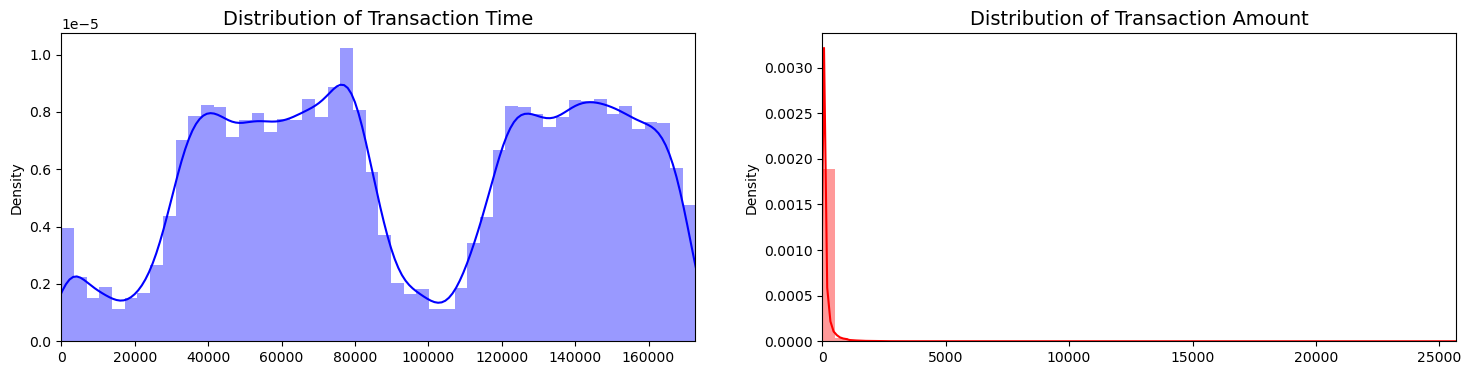

In [11]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(18,4)) ## distribution of time and amount 
#! axis 0 is left, the latter is right

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(time_val), max(time_val)])



plt.show()

### Observations:

- The `Amount` feature appears to be **right-skewed**, indicating the presence of many small transactions and few large ones.
- The `Time` feature does not follow a clear pattern but may reflect **periodic trends** depending on time of day or other operational factors.
- These insights are useful for later preprocessing steps, such as normalization or feature engineering.


In [12]:

import plotly.express as px
d = df['Class'].value_counts().reset_index(name='Count') ## show distrubution of target  varaible 

fig = px.pie(d,values='Count',names=['not fraud',' fraud'],hole=0.4,opacity=0.6,
            color_discrete_sequence=["#0B0A09","#FF7676"],
             labels={'label':'Class','Class':'No. Of Samples'})

fig.add_annotation(text='We can resample the data<br> to get a balanced dataset',
                   x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')
fig.add_annotation(text='Class',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q. How many samples of Credit Card  are  not fraud ?',x=0.47,y=0.98,
               font=dict(color='#000000',size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

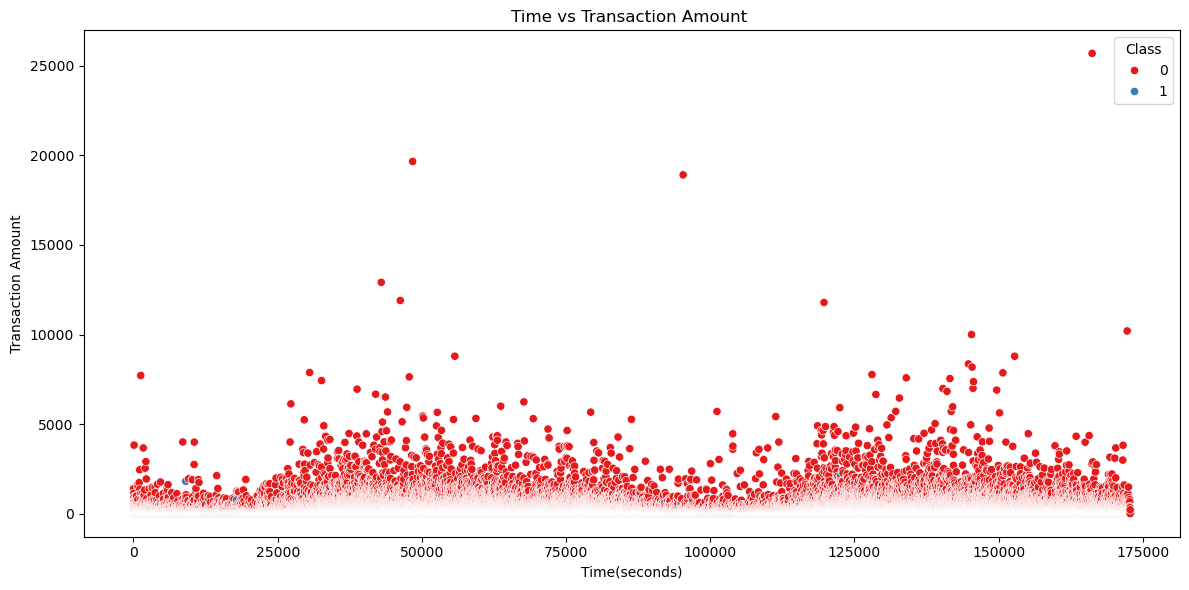

In [13]:
###realtionship between time and amount
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Time',y="Amount",hue="Class",palette="Set1")
plt.xlabel("Time(seconds)")
plt.title("Time vs Transaction Amount ")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.show()



- **Legitimate transactions (Class = 0, shown in red)** dominate the dataset, especially for small amounts.
- **Fraudulent transactions (Class = 1, shown in blue)** are fewer and more scattered, but may cluster around certain time periods or specific amount ranges.
- There is no strong linear relationship between time and amount, but some separation is visible between the two classes, which might help in classification.

Further analysis like **feature engineering based on time intervals** (e.g., time of day, peak hours) might improve model performance.


<Axes: >

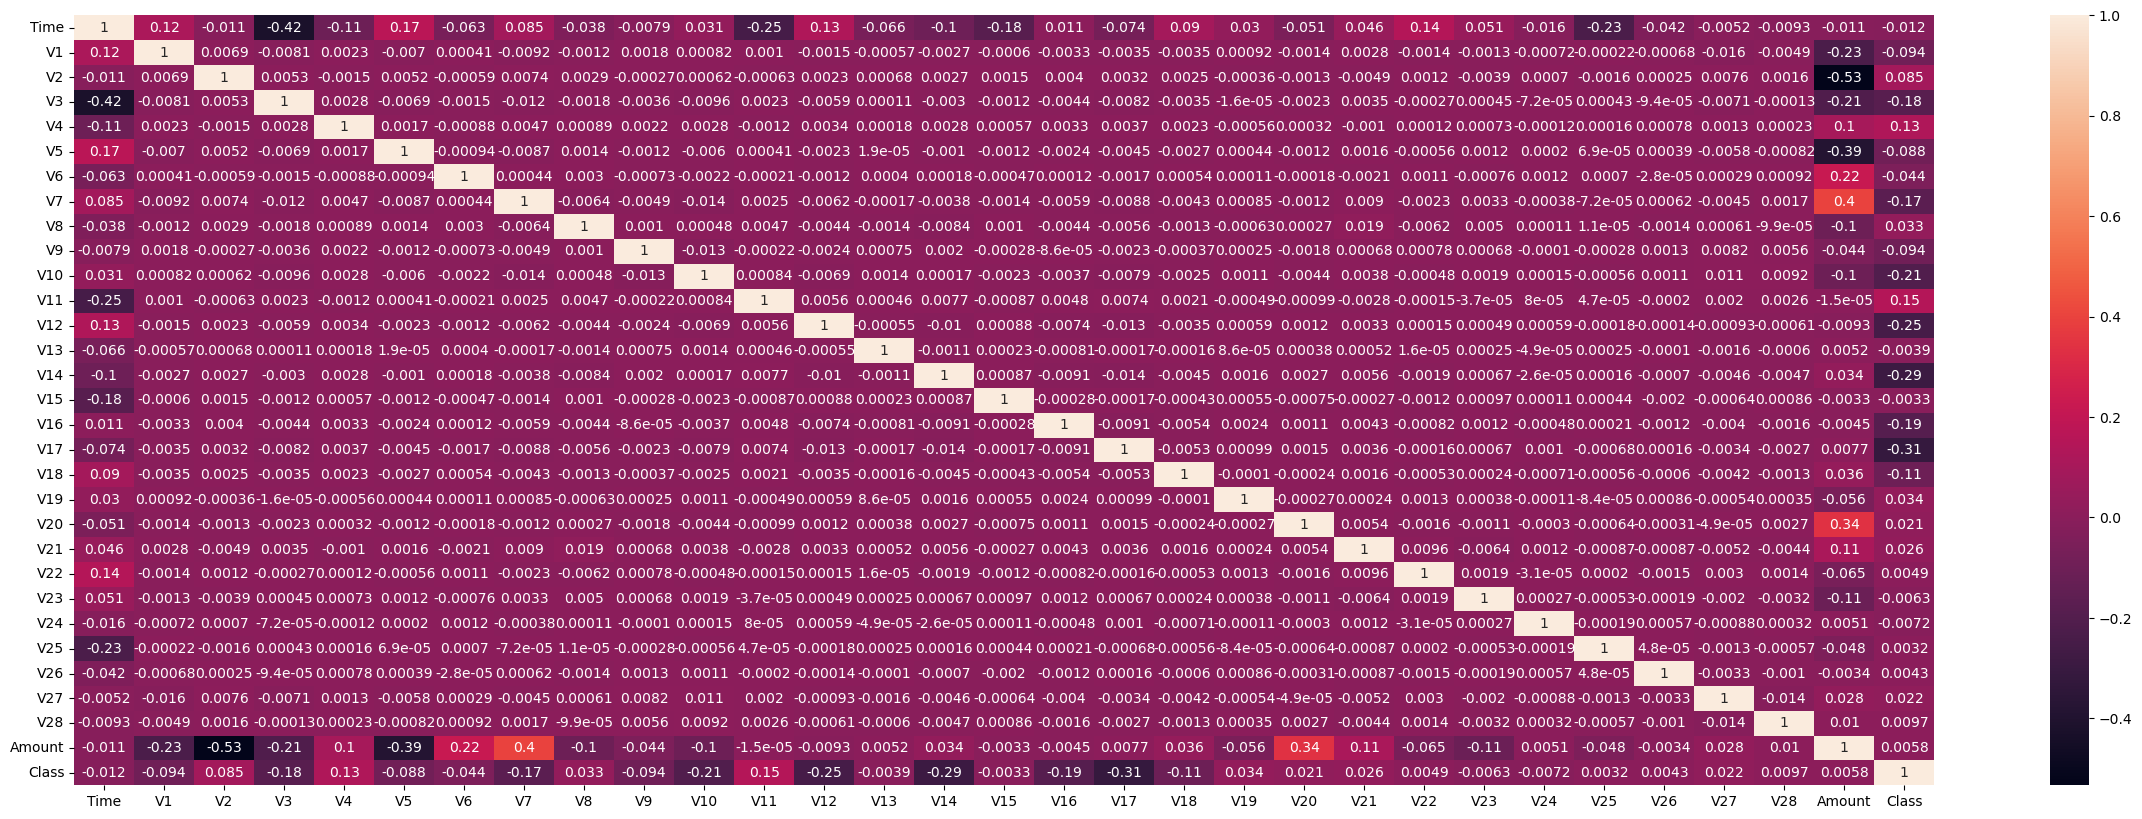

In [14]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),annot=True)



- Most features have very low correlation with the target variable `Class`, indicating that fraudulent behavior is not linearly separable based on single features.

- Some features (like `V14`, `V10`, `V17`) may show moderate negative or positive correlation with `Class` — these could be potentially informative for classification.

- Features such as `Amount` and `Time` show weak correlation with `Class`, suggesting that additional preprocessing or feature engineering may be necessary.

Note: Low correlation does not mean a feature is not useful — non-linear models (like tree-based algorithms) can capture complex relationships that correlation alone cannot reveal.


/tmp/ipykernel_11736/3817907549.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_11736/3817907549.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_11736/3817907549.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_11736/3817907549.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




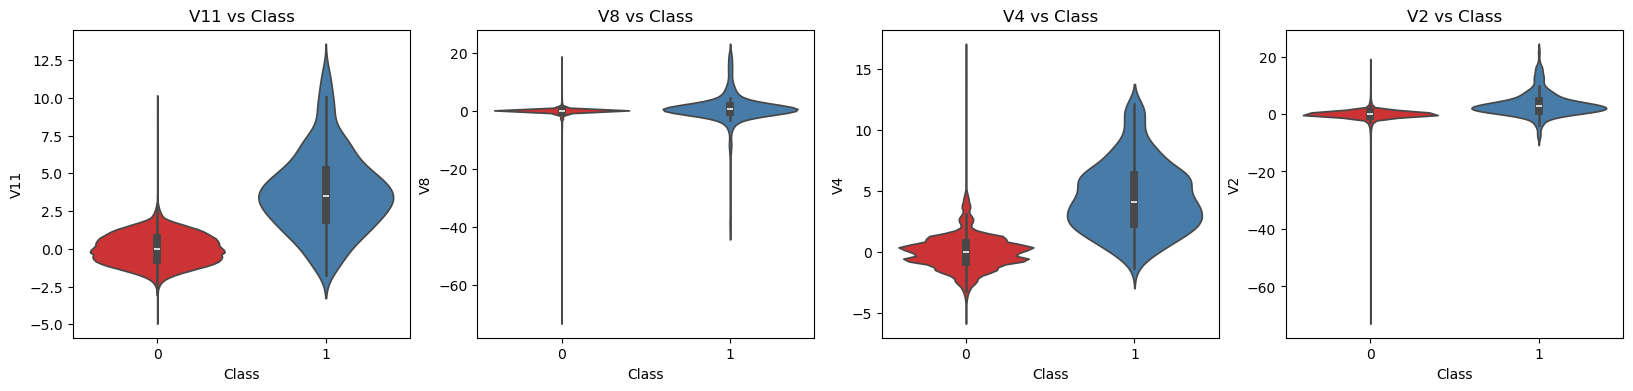

In [15]:
### Positive corrlation

f, axes = plt.subplots(ncols=4, figsize=(20,4))

#s with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.violinplot(x="Class", y="V11", data=df, palette='Set1', ax=axes[0])
axes[0].set_title('V11 vs Class')

sns.violinplot(x="Class", y="V8", data=df, palette='Set1', ax=axes[1])
axes[1].set_title('V8 vs Class')


sns.violinplot(x="Class", y="V4", data=df, palette='Set1', ax=axes[2])
axes[2].set_title('V4 vs Class')


sns.violinplot(x="Class", y="V2", data=df, palette='Set1', ax=axes[3])
axes[3].set_title('V2 vs Class')
plt.show()


#### Features with Positive Correlation:
The following features tend to have higher values in fraudulent transactions:

- `V11`
- `V8`
- `V4`
- `V2`

These features also show noticeable shifts in distribution and can contribute meaningfully to the predictive model.

Visual inspection confirms the statistical correlation values and supports selecting these features for modeling.


/tmp/ipykernel_11736/896833497.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_11736/896833497.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_11736/896833497.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_11736/896833497.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




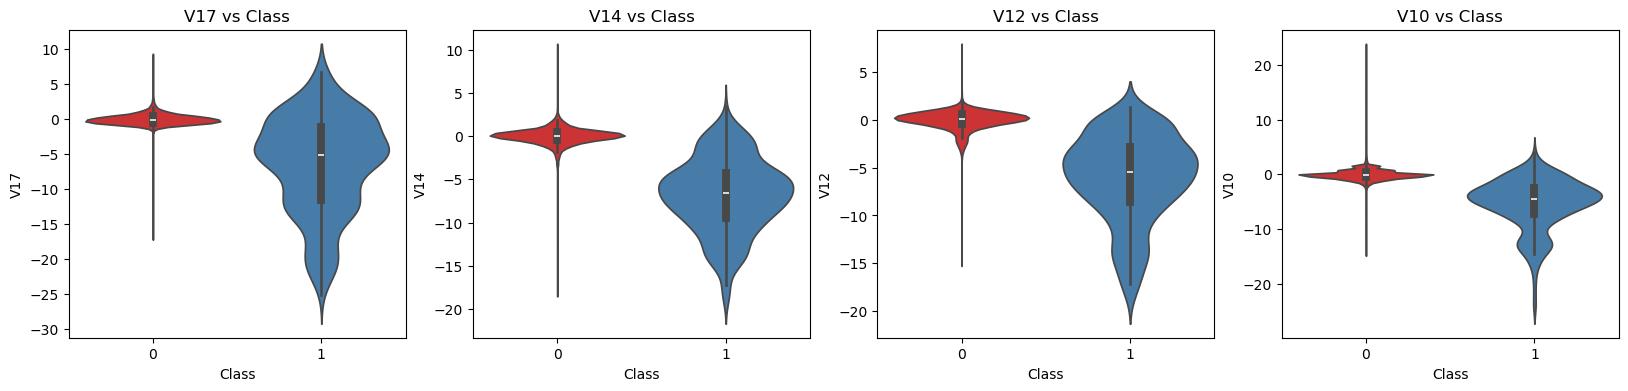

In [16]:
### Negative corrlation

f, axes = plt.subplots(ncols=4, figsize=(20,4))

#s with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.violinplot(x="Class", y="V17", data=df, palette='Set1', ax=axes[0])
axes[0].set_title('V17 vs Class')

sns.violinplot(x="Class", y="V14", data=df, palette='Set1', ax=axes[1])
axes[1].set_title('V14 vs Class')


sns.violinplot(x="Class", y="V12", data=df, palette='Set1', ax=axes[2])
axes[2].set_title('V12 vs Class')


sns.violinplot(x="Class", y="V10", data=df, palette='Set1', ax=axes[3])
axes[3].set_title('V10 vs Class')
plt.show()


#### Features with Negative Correlation:
The following features tend to have lower values in fraudulent transactions:

- `V17`
- `V14`
- `V12`
- `V10`

These features show a clear separation in distribution between fraud and non-fraud classes, indicating that they could be valuable for classification.

In [17]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df[["Amount","Time"]] = rs.fit_transform(df[["Amount","Time"]])


In [18]:
df[["Amount","Time"]].head()

,Amount,Time
0,1.774718,-0.995290
1,-0.268530,-0.995290
2,4.959811,-0.995279
3,1.411487,-0.995279
4,0.667362,-0.995267


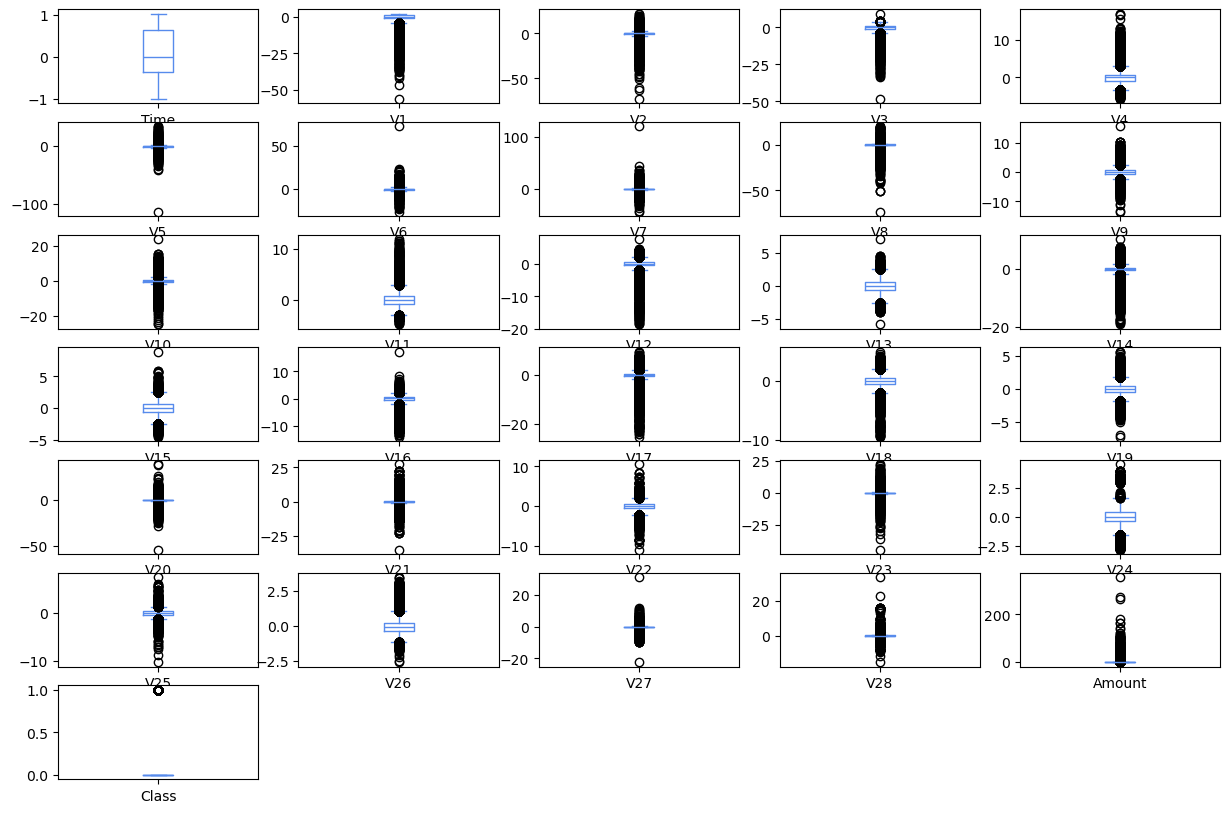

In [19]:
#check for outliers
df.plot(kind='box',subplots=True, figsize=(15, 10), color="#578BEC",layout=(7,5));

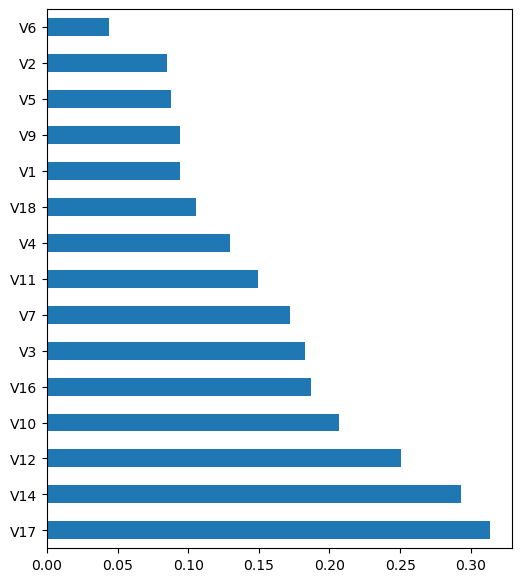

In [20]:
##most Feature have stronge realtionship with target
target = "Class"                                # <‑‑ change if needed
corr_to_target = (df.corr(numeric_only=True)[target]
                  .drop(target)                     # remove self‑correlation
                  .abs()
                  .sort_values(ascending=False))

corr_to_target.head(15).plot.barh(figsize=(6, 7)); 

In [21]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# X_resampled, y_resampled = rus.fit_resample(X, y)

In [22]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [23]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score

## undersampling 

In [24]:
fraud=df.loc[df['Class']==1]
not_fraud=df.loc[df['Class']==0][:473]
normal_distribuation_df=pd.concat([fraud,not_fraud])
df=normal_distribuation_df.sample(frac=1,random_state=42)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154697,0.210739,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,...,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,-0.200389,1
8842,-0.853176,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,-0.305938,1
354,-0.992235,1.026702,-0.661665,0.897601,0.144403,-1.105205,0.020245,-0.707267,0.195918,0.743371,...,0.150661,0.322398,-0.154736,0.097655,0.174639,1.103205,-0.060709,0.016598,1.070783,0
233258,0.738114,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,-3.838399,...,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,13.548463,1
17317,-0.658895,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,...,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,1.084550,1


<Axes: xlabel='Class', ylabel='count'>

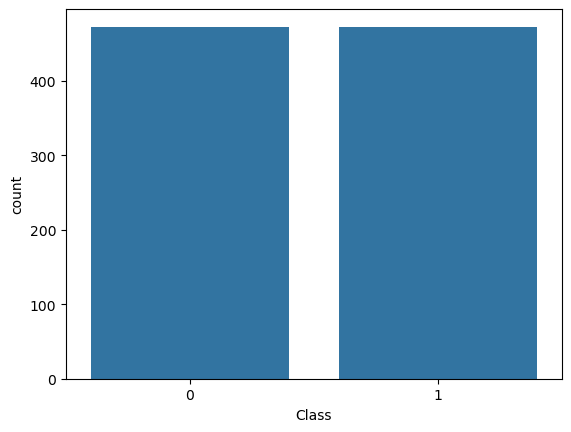

In [25]:
##Balance class 
sns.countplot(data=df,x='Class')

In [26]:
# Separate X (features) and y (target)
X = df.drop(columns=["Class"]) 
y = df["Class"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)


In [28]:
X_train.shape

(756, 30)

In [29]:
y_train.shape

(756,)

In [30]:
####Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01,penalty='l2',solver='lbfgs')
LR.fit(X_train,y_train)
y_pred2=LR.predict(X_test)


In [31]:
print(f"acuuuracy for train model is {LR.score(X_train,y_train)}")
print(f"acuuuracy for test model is {LR.score(X_test,y_test)}")

acuuuracy for train model is 0.9431216931216931

acuuuracy for test model is 0.9368421052631579

In [32]:
acc=accuracy_score(y_test,y_pred2)
f1=f1_score(y_test,y_pred2,average='weighted')
print("Accuracy:", acc)
print("F1 Score:", f1)

Accuracy: 0.9368421052631579

F1 Score: 0.9366666666666666

Accuracy Score: 0.94

classification report:              precision    recall  f1-score   support

           0       0.90      0.99      0.94        95
           1       0.99      0.88      0.93        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

__________________________________________________

Text(0.5, 1.0, 'Logistic Regression- Confution Metrics')

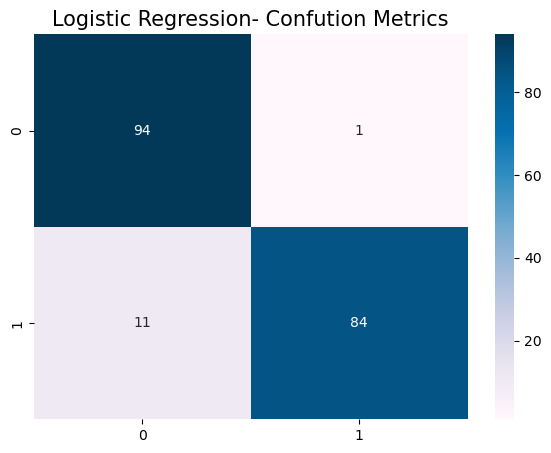

In [33]:
cals_report=classification_report(y_test,y_pred2)

print(f'Accuracy Score: {acc:.2f}')
print(f'classification report:{cals_report} ')
print('_' * 50)
print()

cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.title(f'Logistic Regression- Confution Metrics', fontsize=15)


In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred=mlp.predict(X_test)

In [36]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average='weighted')
print("Accuracy:", acc)
print("F1 Score:", f1)

Accuracy: 0.968421052631579

F1 Score: 0.9684175531914895

Accuracy Score: 0.97

classification report:              precision    recall  f1-score   support

           0       0.96      0.98      0.97        95
           1       0.98      0.96      0.97        95

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

__________________________________________________

Text(0.5, 1.0, 'MLPClassifier- Confution Metrics')

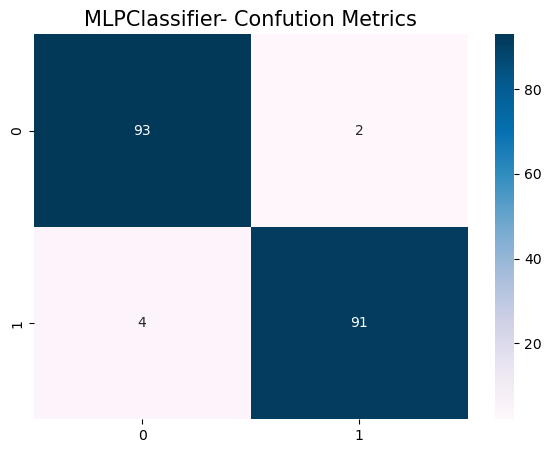

In [37]:
cals_report=classification_report(y_test,y_pred)

print(f'Accuracy Score: {acc:.2f}')
print(f'classification report:{cals_report} ')
print('_' * 50)
print()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.title(f'MLPClassifier- Confution Metrics', fontsize=15)


In [38]:
from xgboost import XGBClassifier
XG=XGBClassifier()
XG.fit(X_train,y_train)

y_pred9=XG.predict(X_test)
acc=accuracy_score(y_test,y_pred9)
print(f'Accuracy Score: {acc:.2f}')


Accuracy Score: 1.00

### Train with kfold

In [39]:
#### train with K_fold
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [40]:
##models
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    'XGBClassifier':XGBClassifier()
    
}

In [41]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)

In [42]:
for key,value in classifiers.items():
    value.fit(X_train,y_train)
    training_score=cross_val_score(value,X_train,y_train,cv=5)
    print("Classifiers: ", value.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    

Classifiers:  LogisticRegression Has a training score of 97.0 % accuracy score

Classifiers:  KNeighborsClassifier Has a training score of 95.0 % accuracy score

Classifiers:  SVC Has a training score of 94.0 % accuracy score

Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score

Classifiers:  XGBClassifier Has a training score of 100.0 % accuracy score

In [43]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), ExtraTreeClassifier(), RandomForestClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])


,model,cv_score
3,ExtraTreeClassifier(),0.968247
4,RandomForestClassifier(),0.997351
1,BaggingClassifier(),0.998675
0,AdaBoostClassifier(),0.998675
2,GradientBoostingClassifier(),0.998675


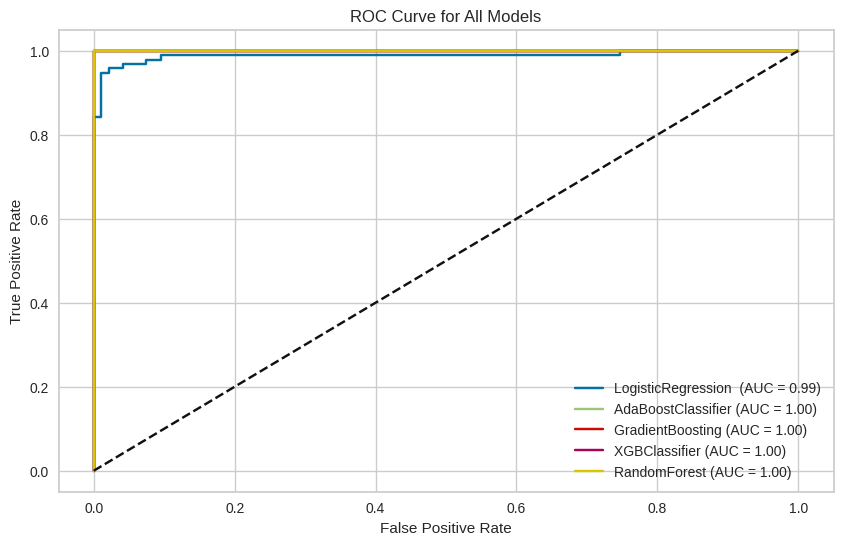

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier

models = {
    "LogisticRegression ":LR,
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
    "RandomForest": RandomForestClassifier()
}

# تدريب كل موديل
for name, model in models.items():
    model.fit(X_train, y_train)

# رسم ROC لكل موديل
plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # خط عشوائي
plt.title("ROC Curve for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


### Hyper_parameter Tuning 

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [46]:
model_params = {
    'logistic regression' : {
        'model': LogisticRegression(),
        'parameter' : {
            'solver': ['liblinear']
        }
    },
    'svm' : {
        'model' : SVC(),
        'parameter' : {
            'kernel' : ['rbf','linear'],
            'C' : [10,15,20]
        }
    },
    'decision tree' : {
        'model' : DecisionTreeClassifier(),
        'parameter' : {
            'criterion' : ['gini', 'entropy']
        }
    },
    'random forest' : {
        'model': RandomForestClassifier(),
        'parameter' : {
            'criterion': ['gini','entropy'],
            'n_estimators' : [50,100,150]
        }
    },
    'naive_bayes_gaussian' : {
        'model' : GaussianNB(),
        'parameter' : {}
    },
    'k nearest neighbors': {
        'model' : KNeighborsClassifier(),
        'parameter' : {
            'n_neighbors' : [5,10,15]
        }
    }
}

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
score = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['parameter'], cv=5)
    clf.fit(X_train,y_train)
    score.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
cc_df = pd.DataFrame(score, columns = ['model', 'best_score', 'best_params'])
cc_df

,model,best_score,best_params
0,logistic regression,0.973545,{'solver': 'liblinear'}
1,svm,0.985457,"{'C': 10, 'kernel': 'linear'}"
2,decision tree,0.998675,{'criterion': 'gini'}
3,random forest,0.998675,"{'criterion': 'gini', 'n_estimators': 50}"
4,naive_bayes_gaussian,0.980141,{}
5,k nearest neighbors,0.948414,{'n_neighbors': 5}
